In [228]:
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
df = pd.read_excel(r'C:/Users/danie/OneDrive/Área de Trabalho/Projetos VS/Churnprediction/churn-kacbot/churn-prediction/docs/dataset.xlsx')

In [230]:
#Variavies Alvo CHURN
df_alvo = df['churn']

#Variaveis preditoras
df = df.drop(columns=['churn', 'companyId', 'plan','createdAt','deletedAt','dataDif'])

In [231]:
df.head()

,numLogin,csm,numTickets,daysEmail,emailIntegration,daysEcommerce,ecommerceIntegration,daysWhatsAppApi,whatsAppApiIntegration,daysGiftback,...,daysFirstCampain,firstCampain,numCampains,receitaInflu,receitaTotal,receitaGiftback,receitacampanha,receitaPainelvendedor,receitaFluxo,ROI
0,110,1,0,8.0,1,0.0,1,8.0,1,NaN,...,8.0,1,10,6616.710042,1.563709e+06,0.00000,179.690002,0.0,6437.020040,0.013339
1,15,1,0,3.0,1,2.0,1,4.0,1,NaN,...,11.0,1,9,15077.130020,3.601970e+05,0.00000,15077.130020,0.0,0.000000,0.109660
2,12,1,10,2.0,1,1.0,1,2.0,1,NaN,...,3.0,1,7,75121.560010,2.666049e+06,0.00000,73289.130020,0.0,1832.429993,0.366172
3,38,1,6,121.0,1,2.0,1,8.0,1,21.0,...,22.0,1,5,4467.000038,4.509929e+05,0.00000,4467.000038,0.0,0.000000,0.025452
4,74,1,0,1.0,1,1.0,1,3.0,1,16.0,...,21.0,1,1,239347.110400,3.621210e+06,32928.23965,71214.330170,0.0,0.000000,1.188533


In [232]:
df.describe()

,numLogin,csm,numTickets,daysEmail,emailIntegration,daysEcommerce,ecommerceIntegration,daysWhatsAppApi,whatsAppApiIntegration,daysGiftback,...,daysFirstCampain,firstCampain,numCampains,receitaInflu,receitaTotal,receitaGiftback,receitacampanha,receitaPainelvendedor,receitaFluxo,ROI
count,830.000000,830.000000,830.000000,627.000000,830.000000,710.000000,830.000000,556.000000,830.00000,569.000000,...,433.000000,830.000000,830.000000,830.000000,8.300000e+02,830.000000,830.000000,830.000000,830.000000,396.000000
mean,37.942169,0.714458,1.920482,29.161085,0.755422,5.722535,0.855422,16.262590,0.66988,22.145870,...,33.235566,0.521687,1.563855,3184.310060,1.036400e+05,457.937384,1724.098591,250.572180,284.924483,0.105606
std,52.818660,0.451945,5.937019,37.338208,0.430096,13.166094,0.351887,22.254695,0.47054,23.831528,...,29.842487,0.499831,4.134079,13882.942165,2.263377e+05,2273.948133,8940.523639,3218.649841,3339.179252,0.301417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.010000
25%,9.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,5.000000,0.00000,6.000000,...,12.000000,0.000000,0.000000,0.000000,7.921605e+03,0.000000,0.000000,0.000000,0.000000,0.001423
50%,24.000000,1.000000,0.000000,9.000000,1.000000,2.000000,1.000000,9.000000,1.00000,15.000000,...,24.000000,1.000000,0.000000,0.000000,3.477669e+04,0.000000,0.000000,0.000000,0.000000,0.027437
75%,51.000000,1.000000,0.000000,48.000000,1.000000,6.000000,1.000000,17.000000,1.00000,29.000000,...,43.000000,1.000000,1.000000,1517.704975,1.083736e+05,152.334999,0.000000,0.000000,0.000000,0.091152
max,958.000000,1.000000,30.000000,202.000000,1.000000,151.000000,1.000000,189.000000,1.00000,168.000000,...,156.000000,1.000000,35.000000,239347.110400,3.621210e+06,34076.070050,119542.010100,89832.000000,86626.000000,2.947257


In [233]:
import numpy as np

In [234]:
x = df
y = df_alvo

In [235]:
churn_indices = y[y == 1].index
non_churn_indices = y[y == 0].index

In [236]:
non_churn_sample = np.random.choice(non_churn_indices, size=len(churn_indices), replace=False)
undersample_indices = np.concatenate([churn_indices, non_churn_sample])

In [237]:
# Definir as variáveis de recursos (X) e alvo (y)
X = df  # df é o DataFrame com as variáveis preditoras
y = df_alvo  # churn é a variável alvo que você separou anteriormente

# Redefinir os índices de X e y
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Agora você pode usar os índices de subamostragem
X_bal = X.loc[undersample_indices]
y_bal = y.loc[undersample_indices]

# Agora você pode usar os índices de subamostragem
X_bal = X.loc[undersample_indices]
y_bal = y.loc[undersample_indices]

receitaPainelvendedor    -0.023246
receitaFluxo             -0.026130
ROI                      -0.037944
csm                      -0.042087
receitacampanha          -0.046019
receitaGiftback          -0.051934
receitaInflu             -0.060185
numCampains              -0.063818
daysGiftback             -0.078053
daysEcommerce            -0.080783
daysWhatsAppApi          -0.085483
numTickets               -0.091819
receitaTotal             -0.107063
ecommerceIntegration     -0.128905
 daysFirstCampain        -0.145292
daysEmail                -0.147880
numLogin                 -0.182523
firstCampain             -0.219040
emailIntegration         -0.262809
whatsAppApiIntegration   -0.266081
giftbackIntegration      -0.353646
dtype: float64


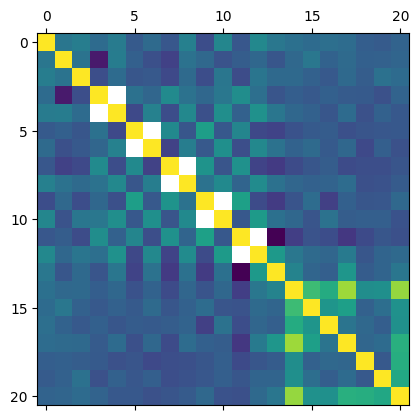

In [238]:
#FAÇA a analise de correlação entre as variaveis preditoras e a variavel alvo
correlacao = df.corrwith(df_alvo)
correlacao = correlacao.sort_values(ascending=False)
print(correlacao)

# Faça uma matriz de correlação
correlacao = df.corr()
plt.matshow(correlacao)
plt.show()


In [239]:
#separar base de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.5, random_state=42)


In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Definir o modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar a cross-validation
scores = cross_val_score(modelo, X_bal, y_bal, cv=5)

# Exibir os resultados
print("Acurácia média:", scores.mean())
print("Desvio padrão:", scores.std())

Acurácia média: 0.8199507389162562
Desvio padrão: 0.069545415579113


In [241]:
#treinar com o modelo random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)


RandomForestClassifier()

In [242]:
#avaliar o modelo

from sklearn.metrics import classification_report

y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.92      0.92      0.92        39

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72



In [243]:
#agora quero avaliar a importancia de cada variavel preditora
importancia = random_forest.feature_importances_
importancia = pd.Series(importancia, index=X.columns)
importancia = importancia.sort_values(ascending=False)
print(importancia)

numLogin                  0.137385
receitaTotal              0.129185
daysEmail                 0.092835
daysWhatsAppApi           0.088173
daysGiftback              0.081325
daysEcommerce             0.077660
 daysFirstCampain         0.064739
giftbackIntegration       0.059076
whatsAppApiIntegration    0.053591
ROI                       0.047721
receitaInflu              0.041276
emailIntegration          0.026490
receitaGiftback           0.022779
csm                       0.019574
numCampains               0.013831
ecommerceIntegration      0.012265
numTickets                0.009985
receitaPainelvendedor     0.007149
receitacampanha           0.007071
firstCampain              0.006039
receitaFluxo              0.001851
dtype: float64
